                    Vgate Vdrain                    Idrain     IdMax time_s
422                    -3    0.1   -3.0000000000000002E-15  0.000001      1
423                 -2.95    0.1    1.2000000000000001E-14       NaN      1
424                  -2.9    0.1                 -1.89E-13       NaN      1
425                 -2.85    0.1                 -1.63E-13       NaN      1
426   -2.8000000000000003    0.1   -2.5200000000000004E-13       NaN      1
427                 -2.75    0.1   -9.5000000000000012E-14       NaN      1
428                  -2.7    0.1    -5.700000000000001E-14       NaN      1
429                 -2.65    0.1                 -1.48E-13       NaN      1
430                  -2.6    0.1   -1.4500000000000001E-13       NaN      1
431   -2.5500000000000003    0.1                 -1.53E-13       NaN      1
432                  -2.5    0.1   -1.3700000000000002E-13       NaN      1
433                 -2.45    0.1   -1.4900000000000002E-13       NaN      1
434         

C:\Users\김종민\AppData\Local\Temp\ipykernel_17464\933415411.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IdMax'] = pd.to_numeric(df['IdMax'], errors='coerce')
C:\Users\김종민\AppData\Local\Temp\ipykernel_17464\933415411.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['block'] = df['IdMax'].notna().cumsum()


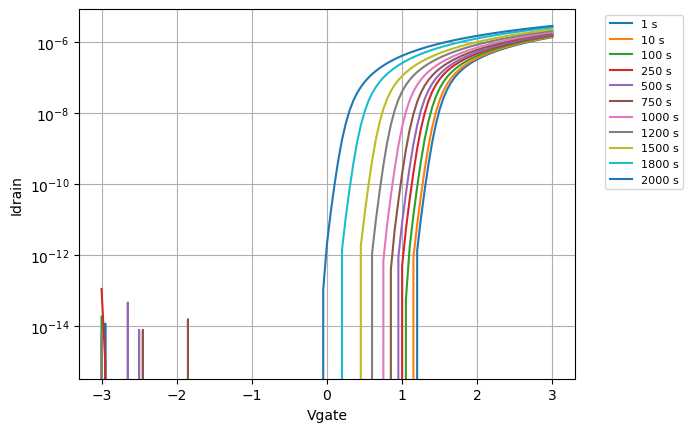

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv


path = "PBTI_TEST.csv"
# csv 빈칸 열이 난잡할때 그대로 들고오는 코드
rows = []
with open(path, "r", encoding="utf-8-sig", errors="replace", newline="") as f:
    reader = csv.reader(f)
    for r in reader:
        rows.append(r)

max_len = max(len(r) for r in rows)
rows = [r + [""] * (max_len - len(r)) for r in rows]  # 부족한 열은 빈칸으로 채움

raw_data = pd.DataFrame(rows)  # 모든 셀이 보존됨

# 원하는 데이터만 들고오기
raw_data2 = raw_data[0].isin(['DataValue'])

raw_data = raw_data[raw_data2]
raw_data = raw_data.iloc[:,1:6]
raw_data.columns = ['Vgate','Vdrain','Idrain','IdMax','Vth@Id']

df = raw_data

time = df.loc[df['Idrain'].isin([' ']),'Vgate']
time_list = time.tolist()
time_count = len(time_list)
df = df.iloc[time_count:,:]

df['IdMax'] = pd.to_numeric(df['IdMax'], errors='coerce')

# 1) IdMax가 존재하는 행마다 블록 번호 1,2,3,... 증가
df['block'] = df['IdMax'].notna().cumsum()

# (선택) 만약 IdMax 나오기 전 구간이 있으면 block=0인데, 보통 필요 없으니 제거
df = df[df['block'] > 0].copy()

# 2) block 번호를 time_list에 매핑
#    block=1 -> time_list[0], block=2 -> time_list[1], ...
mapping = {i + 1: t for i, t in enumerate(time_list)}

df['time_s'] = df['block'].map(mapping)



# 5) 정리: 필요 없는 block 컬럼 제거하고 확인
print(df[['Vgate','Vdrain','Idrain','IdMax','time_s']].head(30))


df['Vgate']  = pd.to_numeric(df['Vgate'], errors='coerce')
df['Idrain'] = pd.to_numeric(df['Idrain'], errors='coerce')
df['time_s'] = pd.to_numeric(df['time_s'], errors='coerce')

# 2) 유효값만 남기기
plot_df = df.dropna(subset=['Vgate', 'Idrain', 'time_s']).copy()

# (선택) time 순서 정렬
times = sorted(plot_df['time_s'].unique())

plt.figure()

for t in times:
    d = plot_df[plot_df['time_s'] == t].sort_values('Vgate')
    plt.semilogy(d['Vgate'].to_numpy(), d['Idrain'].to_numpy(),
             linestyle='-', label=f'{int(t)} s')



plt.xlabel('Vgate')
plt.ylabel('Idrain')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 8)   
plt.grid(True)
plt.show()